<a href="https://colab.research.google.com/github/commandermaks/Mchine-learning/blob/Soft-computing/119cs0504_SC_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
iris = datasets.load_iris()

In [ ]:
def g(x1,x2,sigma):
 return (1/(math.sqrt(2*3.14*sigma*sigma)))*math.exp(-((np.linalg.norm(x1-x2))*(np.linalg.norm(x1-x2)))/(2*sigma*sigma))


In [ ]:
 def PNN_classify(X,data,target,sigma,num_classes):
  gstore_x = []
  sum_output = []
  for i in range(data.shape[0]):
    gstore_x.append(g(X,data[i],sigma))
  for i in range(num_classes):
    sum_output.append(0.0)
  for i in range(data.shape[0]):
    for j in range(num_classes):
      if(target[i]==j):
        sum_output[j] = sum_output[j] + gstore_x[i]
  out = 0
  maxi = sum_output[0]
  for i in range(num_classes):
    if(i==0):
      continue
    if(sum_output[i]>maxi):
      out = i
    maxi = sum_output[i]
  return out

In [ ]:
def process(Y_,Y_pred_,c):
 for i in range(Y_.shape[0]):
  if Y_[i] != c:
    Y_[i] = 0
  else:
    Y_[i] = 1
  if Y_pred_[i] != c:
    Y_pred_[i] = 0
  else:
    Y_pred_[i] = 1
 return Y_,Y_pred_


In [ ]:
def training_data(X,Y,data,target,sigma,num_classes,x=0):
 Y_pred = []
 for i in range(X.shape[0]):
  Y_pred.append(PNN_classify(X[i],data,target,sigma,num_classes))
 if x == 1:
  for i in range(len(Y_pred)):
    Y_pred[i] = bin(Y_pred[i])
    Y[i] = bin(Y[i])
  print(confusion_matrix(Y,Y_pred))
  print(classification_report(Y,Y_pred))
  return
 print(classification_report(Y,Y_pred))
 print(confusion_matrix(Y,Y_pred))
 Y = np.array(Y)
 Y_pred = np.array(Y_pred)
 Y0 = np.copy(Y)
 Y0_pred = np.copy(Y_pred)
 Y0,Y0_pred = process(Y0,Y0_pred,0)
 RocCurveDisplay.from_predictions(Y0,Y0_pred)
 if(num_classes>2):
  Y1 = np.copy(Y)
  Y1_pred = np.copy(Y_pred)
  Y1,Y1_pred = process(Y1,Y1_pred,1)
  RocCurveDisplay.from_predictions(Y1,Y1_pred)
  Y2 = np.copy(Y)
  Y2_pred = np.copy(Y_pred)
  Y2,Y2_pred = process(Y2,Y2_pred,2)
  RocCurveDisplay.from_predictions(Y2,Y2_pred)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


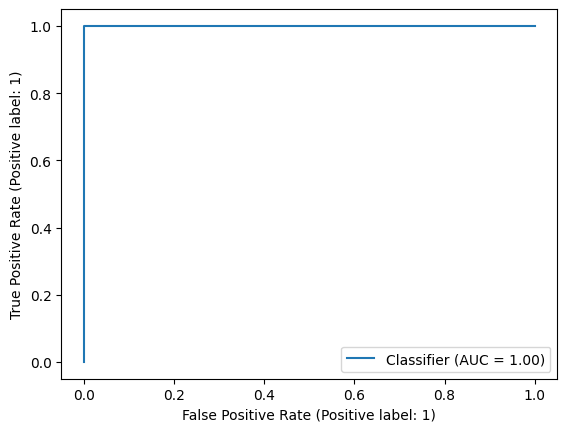

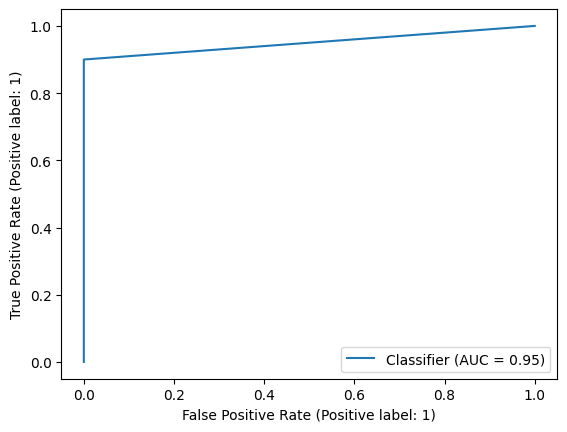

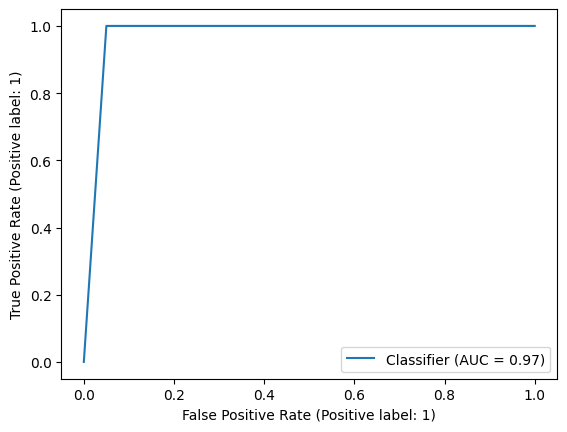

In [ ]:
X = iris['data']
Y = iris['target']
sigma = 0.5
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
training_data(X_test,Y_test,X_train,Y_train,sigma,3)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        42
           1       0.93      0.76      0.84        72

    accuracy                           0.82       114
   macro avg       0.81      0.83      0.81       114
weighted avg       0.84      0.82      0.82       114

[[38  4]
 [17 55]]


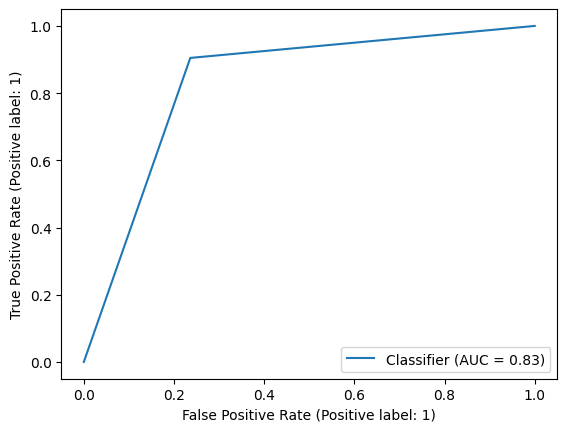

In [ ]:
breast_cancer = datasets.load_breast_cancer()
#print(breast_cancer)
X = breast_cancer['data']
Y = breast_cancer['target']
sigma = 0.5
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
training_data(X_test,Y_test,X_train,Y_train,sigma,2)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.79      0.79      0.79        14
           2       0.64      0.70      0.67        10

    accuracy                           0.78        36
   macro avg       0.78      0.77      0.77        36
weighted avg       0.79      0.78      0.78        36

[[10  0  2]
 [ 1 11  2]
 [ 0  3  7]]


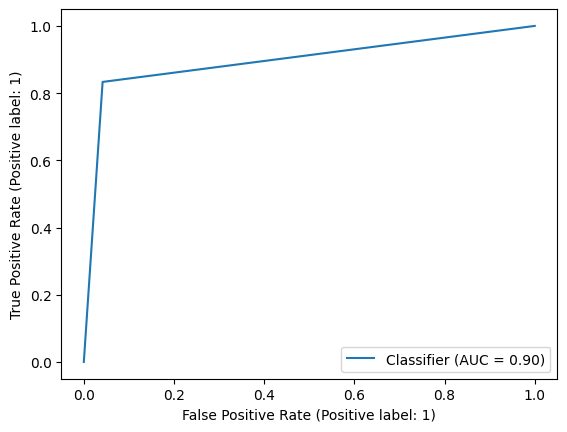

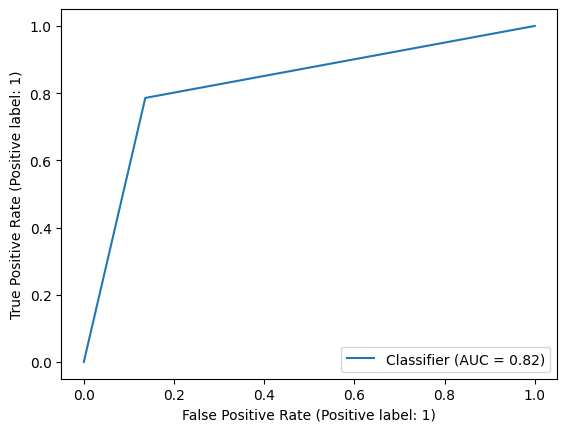

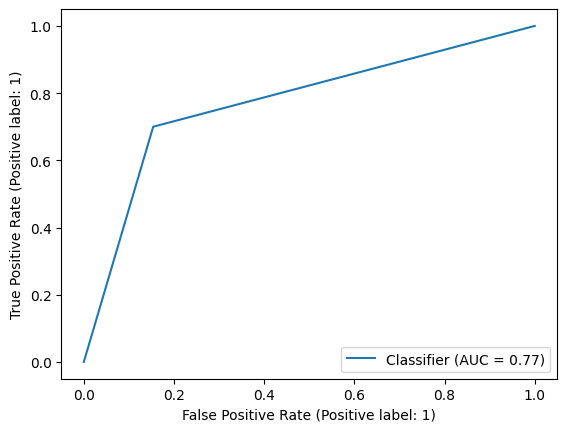

In [ ]:
wine = datasets.load_wine()
#print(wine)
X = wine['data']
Y = wine['target']
sigma = 0.5
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
training_data(X_test,Y_test,X_train,Y_train,sigma,3)

In [ ]:
column = ['pregnancies','glucose','BP','SkinThickness','Insulin','BMI','DBF','age','Outcome']
diabetes = pd.read_csv("diabetes.csv",names = column)
X = diabetes.iloc[:,:8].values
Y = diabetes['Outcome'].values
X = X[1:]
Y = Y[1:]
for i in range(X.shape[0]):
 for j in range(X[0].shape[0]):
  X[i][j] = float(X[i][j])
for i in range(Y.shape[0]):
 Y[i] = int(Y[i])
#print(X,Y)
sigma = 0.5
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
#print(Y_test)
training_data(X_test,Y_test,X_train,Y_train,sigma,2,1)

FileNotFoundError: ignored